# Projet Fraude 



In [1]:
import warnings
warnings.simplefilter('ignore')
#autres
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Importer les dataset

In [2]:
#target --> class : 1 Fraud | 0 ok 
f_data = pd.read_csv("../data/Fraud_Data.csv", parse_dates=["signup_time", "purchase_time"]);

f_data.head()

user_id         signup_time       purchase_time  purchase_value  \
0    22058 2015-02-24 22:55:49 2015-04-18 02:47:11              34   
1   333320 2015-06-07 20:39:50 2015-06-08 01:38:54              16   
2     1359 2015-01-01 18:52:44 2015-01-01 18:52:45              15   
3   150084 2015-04-28 21:13:25 2015-05-04 13:54:50              44   
4   221365 2015-07-21 07:09:52 2015-09-09 18:40:53              39   

       device_id source browser sex  age    ip_address  class  
0  QVPSPJUOCKZAR    SEO  Chrome   M   39  7.327584e+08      0  
1  EOGFQPIZPYXFZ    Ads  Chrome   F   53  3.503114e+08      0  
2  YSSKYOSJHPPLJ    SEO   Opera   M   53  2.621474e+09      1  
3  ATGTXKYKUDUQN    SEO  Safari   M   41  3.840542e+09      0  
4  NAUITBZFJKHWW    Ads  Safari   M   45  4.155831e+08      0

In [3]:
ip_data = pd.read_csv("../data/IpAddress_to_Country.csv");
ip_data["upper_bound_ip_address"] = ip_data["upper_bound_ip_address"].astype(float)

ip_data.head()

lower_bound_ip_address  upper_bound_ip_address    country
0              16777216.0              16777471.0  Australia
1              16777472.0              16777727.0      China
2              16777728.0              16778239.0      China
3              16778240.0              16779263.0  Australia
4              16779264.0              16781311.0      China

### Créer une nouvelle colonne `country` en effectuant une jointure entre les deux dataset 

In [4]:
f_data.info()
ip_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   user_id         151112 non-null  int64         
 1   signup_time     151112 non-null  datetime64[ns]
 2   purchase_time   151112 non-null  datetime64[ns]
 3   purchase_value  151112 non-null  int64         
 4   device_id       151112 non-null  object        
 5   source          151112 non-null  object        
 6   browser         151112 non-null  object        
 7   sex             151112 non-null  object        
 8   age             151112 non-null  int64         
 9   ip_address      151112 non-null  float64       
 10  class           151112 non-null  int64         
dtypes: datetime64[ns](2), float64(1), int64(4), object(4)
memory usage: 12.7+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138846 entries, 0 to 138845
Data columns (total 3 columns):
 #   Col

In [5]:
countries = []
for i in range(len(f_data)):
    ip = f_data.loc[i, "ip_address"]
    tmp = ip_data[(ip >= ip_data["lower_bound_ip_address"]) & (ip <= ip_data["upper_bound_ip_address"])]
    
    if len(tmp) == 1:
        countries.append(tmp["country"].values[0])
    else:
        countries.append("NA")
f_data["country"] = countries

f_data.head()

user_id         signup_time       purchase_time  purchase_value  \
0    22058 2015-02-24 22:55:49 2015-04-18 02:47:11              34   
1   333320 2015-06-07 20:39:50 2015-06-08 01:38:54              16   
2     1359 2015-01-01 18:52:44 2015-01-01 18:52:45              15   
3   150084 2015-04-28 21:13:25 2015-05-04 13:54:50              44   
4   221365 2015-07-21 07:09:52 2015-09-09 18:40:53              39   

       device_id source browser sex  age    ip_address  class        country  
0  QVPSPJUOCKZAR    SEO  Chrome   M   39  7.327584e+08      0          Japan  
1  EOGFQPIZPYXFZ    Ads  Chrome   F   53  3.503114e+08      0  United States  
2  YSSKYOSJHPPLJ    SEO   Opera   M   53  2.621474e+09      1  United States  
3  ATGTXKYKUDUQN    SEO  Safari   M   41  3.840542e+09      0             NA  
4  NAUITBZFJKHWW    Ads  Safari   M   45  4.155831e+08      0  United States

### Créer une nouvelle variable `time_diff` qui sera la différence entre les variables `purchase_time` et `signup_time`

In [6]:
time_diff = f_data["purchase_time"] - f_data["signup_time"]
f_data["time_diff"] = time_diff.apply(lambda time_d : time_d.total_seconds())

f_data.head()

user_id         signup_time       purchase_time  purchase_value  \
0    22058 2015-02-24 22:55:49 2015-04-18 02:47:11              34   
1   333320 2015-06-07 20:39:50 2015-06-08 01:38:54              16   
2     1359 2015-01-01 18:52:44 2015-01-01 18:52:45              15   
3   150084 2015-04-28 21:13:25 2015-05-04 13:54:50              44   
4   221365 2015-07-21 07:09:52 2015-09-09 18:40:53              39   

       device_id source browser sex  age    ip_address  class        country  \
0  QVPSPJUOCKZAR    SEO  Chrome   M   39  7.327584e+08      0          Japan   
1  EOGFQPIZPYXFZ    Ads  Chrome   F   53  3.503114e+08      0  United States   
2  YSSKYOSJHPPLJ    SEO   Opera   M   53  2.621474e+09      1  United States   
3  ATGTXKYKUDUQN    SEO  Safari   M   41  3.840542e+09      0             NA   
4  NAUITBZFJKHWW    Ads  Safari   M   45  4.155831e+08      0  United States   

   time_diff  
0  4506682.0  
1    17944.0  
2        1.0  
3   492085.0  
4  4361461.0

### Regroupper les `user_id` par `device_id`  afin d'avoir le nombre de device par client  

In [7]:
by_device_id = f_data.groupby(["device_id"])
f_data["device_num"] = f_data["device_id"].apply(lambda device_id : len(by_device_id.get_group(device_id).values))

f_data.head()

user_id         signup_time       purchase_time  purchase_value  \
0    22058 2015-02-24 22:55:49 2015-04-18 02:47:11              34   
1   333320 2015-06-07 20:39:50 2015-06-08 01:38:54              16   
2     1359 2015-01-01 18:52:44 2015-01-01 18:52:45              15   
3   150084 2015-04-28 21:13:25 2015-05-04 13:54:50              44   
4   221365 2015-07-21 07:09:52 2015-09-09 18:40:53              39   

       device_id source browser sex  age    ip_address  class        country  \
0  QVPSPJUOCKZAR    SEO  Chrome   M   39  7.327584e+08      0          Japan   
1  EOGFQPIZPYXFZ    Ads  Chrome   F   53  3.503114e+08      0  United States   
2  YSSKYOSJHPPLJ    SEO   Opera   M   53  2.621474e+09      1  United States   
3  ATGTXKYKUDUQN    SEO  Safari   M   41  3.840542e+09      0             NA   
4  NAUITBZFJKHWW    Ads  Safari   M   45  4.155831e+08      0  United States   

   time_diff  device_num  
0  4506682.0           1  
1    17944.0           1  
2        1.0          12  
3   492085.0           1  
4  4361461.0           1

### Faire de même pour les `ip_address` 

In [8]:
by_ip_address = f_data.groupby(["ip_address"])
f_data["ip_num"] = f_data["ip_address"].apply(lambda ip_address : len(by_ip_address.get_group(ip_address).values))

f_data.head()

user_id         signup_time       purchase_time  purchase_value  \
0    22058 2015-02-24 22:55:49 2015-04-18 02:47:11              34   
1   333320 2015-06-07 20:39:50 2015-06-08 01:38:54              16   
2     1359 2015-01-01 18:52:44 2015-01-01 18:52:45              15   
3   150084 2015-04-28 21:13:25 2015-05-04 13:54:50              44   
4   221365 2015-07-21 07:09:52 2015-09-09 18:40:53              39   

       device_id source browser sex  age    ip_address  class        country  \
0  QVPSPJUOCKZAR    SEO  Chrome   M   39  7.327584e+08      0          Japan   
1  EOGFQPIZPYXFZ    Ads  Chrome   F   53  3.503114e+08      0  United States   
2  YSSKYOSJHPPLJ    SEO   Opera   M   53  2.621474e+09      1  United States   
3  ATGTXKYKUDUQN    SEO  Safari   M   41  3.840542e+09      0             NA   
4  NAUITBZFJKHWW    Ads  Safari   M   45  4.155831e+08      0  United States   

   time_diff  device_num  ip_num  
0  4506682.0           1       1  
1    17944.0           1       1  
2        1.0          12      12  
3   492085.0           1       1  
4  4361461.0           1       1

### Traiter les variables `signup_time` & `purchase_time` afin de les différentier suivant la semaine et le week end  

In [9]:
f_data["signup_day"] = f_data["signup_time"].apply(lambda signup_time : signup_time.weekday())
f_data["signup_week"] = f_data["signup_time"].apply(lambda signup_time : signup_time.isocalendar()[1])

f_data["purchase_day"] = f_data["purchase_time"].apply(lambda purchase_time : purchase_time.weekday())
f_data["purchase_week"] = f_data["purchase_time"].apply(lambda purchase_time : purchase_time.isocalendar()[1])

f_data.head()

user_id         signup_time       purchase_time  purchase_value  \
0    22058 2015-02-24 22:55:49 2015-04-18 02:47:11              34   
1   333320 2015-06-07 20:39:50 2015-06-08 01:38:54              16   
2     1359 2015-01-01 18:52:44 2015-01-01 18:52:45              15   
3   150084 2015-04-28 21:13:25 2015-05-04 13:54:50              44   
4   221365 2015-07-21 07:09:52 2015-09-09 18:40:53              39   

       device_id source browser sex  age    ip_address  class        country  \
0  QVPSPJUOCKZAR    SEO  Chrome   M   39  7.327584e+08      0          Japan   
1  EOGFQPIZPYXFZ    Ads  Chrome   F   53  3.503114e+08      0  United States   
2  YSSKYOSJHPPLJ    SEO   Opera   M   53  2.621474e+09      1  United States   
3  ATGTXKYKUDUQN    SEO  Safari   M   41  3.840542e+09      0             NA   
4  NAUITBZFJKHWW    Ads  Safari   M   45  4.155831e+08      0  United States   

   time_diff  device_num  ip_num  signup_day  signup_week  purchase_day  \
0  4506682.0           1       1           1            9             5   
1    17944.0           1       1           6           23             0   
2        1.0          12      12           3            1             3   
3   492085.0           1       1           1           18             0   
4  4361461.0           1       1           1           30             2   

   purchase_week  
0             16  
1             24  
2              1  
3             19  
4             37

### Définir vos variables de travail (X, y)

In [10]:
columns = ["signup_day", "signup_week", "purchase_day", "purchase_week", "purchase_value", "source", 
                 "browser", "sex", "age", "country", "time_diff", "device_num", "ip_num", "class"]
f_data = f_data[columns]
f_data.head()

signup_day  signup_week  purchase_day  purchase_week  purchase_value  \
0           1            9             5             16              34   
1           6           23             0             24              16   
2           3            1             3              1              15   
3           1           18             0             19              44   
4           1           30             2             37              39   

  source browser sex  age        country  time_diff  device_num  ip_num  class  
0    SEO  Chrome   M   39          Japan  4506682.0           1       1      0  
1    Ads  Chrome   F   53  United States    17944.0           1       1      0  
2    SEO   Opera   M   53  United States        1.0          12      12      1  
3    SEO  Safari   M   41             NA   492085.0           1       1      0  
4    Ads  Safari   M   45  United States  4361461.0           1       1      0

In [10]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

signup_day  signup_week  purchase_day  purchase_week  purchase_value  \
0           1            9             5             16              34   
1           6           23             0             24              16   
2           3            1             3              1              15   
3           1           18             0             19              44   
4           1           30             2             37              39   

  source browser sex  age        country  time_diff  device_num  ip_num  class  
0    SEO  Chrome   M   39          Japan      13882           1       1      0  
1    Ads  Chrome   F   53  United States      17944           1       1      0  
2    SEO   Opera   M   53  United States          1          12      12      1  
3    SEO  Safari   M   41             NA      60085           1       1      0  
4    Ads  Safari   M   45  United States      41461           1       1      0

### Afficher les informations du dataset afin de vizualiser les variables numeriques et categoriques

<class 'pandas.core.frame.DataFrame'>
Int64Index: 151112 entries, 0 to 151111
Data columns (total 14 columns):
signup_day        151112 non-null int64
signup_week       151112 non-null int64
purchase_day      151112 non-null int64
purchase_week     151112 non-null int64
purchase_value    151112 non-null int64
source            151112 non-null object
browser           151112 non-null object
sex               151112 non-null object
age               151112 non-null int64
country           151112 non-null object
time_diff         151112 non-null int64
device_num        151112 non-null int64
ip_num            151112 non-null int64
class             151112 non-null int64
dtypes: int64(10), object(4)
memory usage: 17.3+ MB


### Traiter les variables catégoriques

### Spliter vos variables 

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print("Shape du dataset d'entrainement : {} | Shape du dataset de test : {}".format(X_train.shape, X_test.shape))

Shape du dataset d'entrainement : (105778, 13) | Shape du dataset de test : (45334, 13)


### Instancier un `RandomForestClassifier` et l'entrainer sur vos données 

In [14]:
from sklearn. import RandomForestClassifier

random_forest_classifier = RandomForestClassifier(n_estimators=100)
random_forest_classifier.fit(X_train, y_train)

### Afficher l'accuracy moyenne pour 10 'fold cross validation'

In [15]:
accuracy = cross_val_score(random_forest_classifier, X_train, y_train, sorting="accuracy").mean()
print("L'accuracy moyenne pour 10 'fold cross validation' est {0:.2f}%".format(accuracy * 100))

L'accuracy moyenne pour 10 'fold cross validation' est 95.56%


### Afficher les `feature_importances_`

In [17]:
feature_importances = pd.Series(random_forest_classifier.feature_importances_, index=colums[:-1])
                        .sort_values(ascending=False)
feature_importances

time_diff         0.274568
purchase_week     0.145555
ip_num            0.137471
device_num        0.089743
signup_week       0.084465
purchase_value    0.064497
age               0.054936
country           0.040763
signup_day        0.033725
purchase_day      0.029160
browser           0.021741
source            0.013733
sex               0.009643
dtype: float64

### Vizualiser les sur un graphique 

Text(0.5, 1.0, 'Visualizing Important Features')

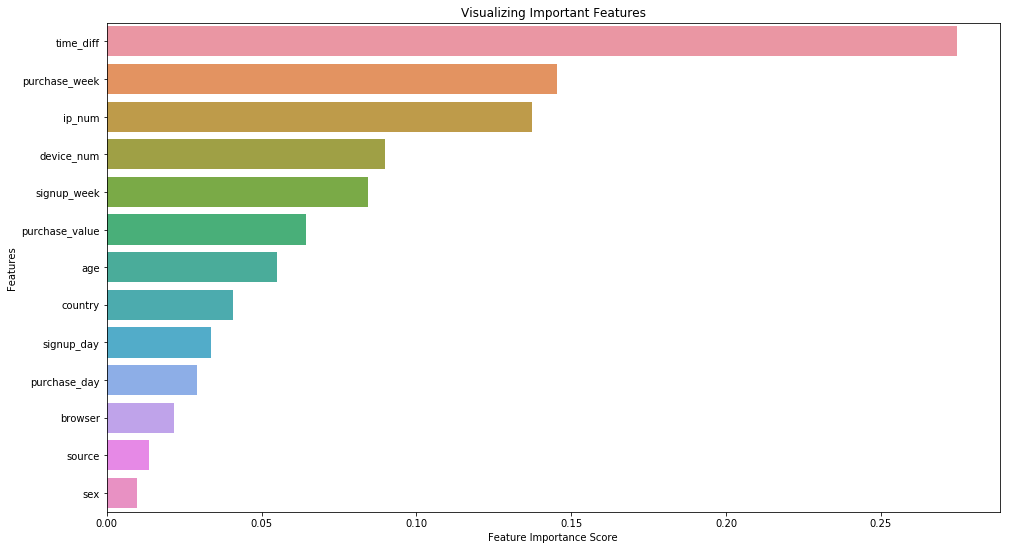

### Afficher le `Classification report`

In [19]:
classification_report(y_true=y_test, y_pred=random_forest_classifier.predict(X_test), labels=[0, 1])

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     41177
           1       1.00      0.55      0.71      4157

   micro avg       0.96      0.96      0.96     45334
   macro avg       0.98      0.77      0.84     45334
weighted avg       0.96      0.96      0.95     45334



### Traçer la courbe AUC 

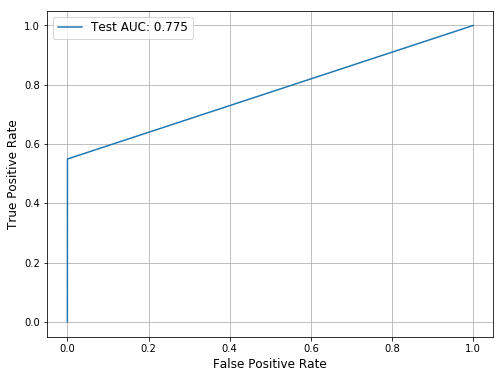

In [20]:
plot_roc_curve(random_forest_classifier, X_test, y_test)
plt.show()

### Afficher la matrice de confusion 
Qu'en pensez vous ? 

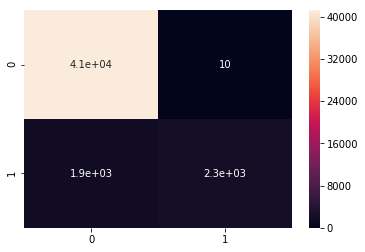

### Faire une selection de certaine variables et spliter vos varibales 

In [22]:

print("Shape du dataset d'entrainement : {} | Shape du dataset de test : {}".format(X_train.shape, X_test.shape))

Shape du dataset d'entrainement : (105778, 4) | Shape du dataset de test : (45334, 4)


### Entrainer un classifieur `LogisticRegression` sur ces variables 

In [23]:
accuracy = 
print("L'accuracy moyenne pour 10 'fold cross validation' est {0:.2f}%".format(accuracy))

L'accuracy moyenne pour 10 'fold cross validation' est 95.39%
